# **Homework 4**
Create a copy of the notebook to start answering the questions. Name your notebook in the format HW3_lastname_firstname.ipynb to facilitate the grading process.

Answer all the questions, test your code to ensure there are no errors and the results are as expected. Once you have answered all the questions, save the final copy, then go to File-> click on Download.ipynb. Once the local copy has been downloaded, submit your file on Blackboard under the corresponding assignment section. Also provide us a link to your notebook during submission. 

**NOTE:** Please give the TAs the permission to access your notebooks through the links you have provided during submission.

The due date of this homework is 03/14/2021 (Sunday).

Please ensure you follow all the steps mentioned in the homework.

Most questions have sample outputs to help you understand the question.

You can submit your solutions any number of times until the deadline.

The datasets used in this homework can be found in the google drive link below - 

https://drive.google.com/drive/folders/1NxCh4X7u7wVo5aHojxjLNs9wC7B7zJhb?usp=sharing

Follow the necessary steps to import data to test your code. You can use any method to read your data in the notebook. We will not be grading the methods you use. We will only grade the code from the point where you read the dataset into a pandas dataframe - (pd.read_csv('file_name')) 

Import all the libraries you require in the cell below.

In [ ]:
# import all necessary libraries here
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import ResidualsPlot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

### 1. Create a statistical summary of the data in the file “CommuteStLouis.csv”. Plot a histogram of age for the CommuteStLouis data.

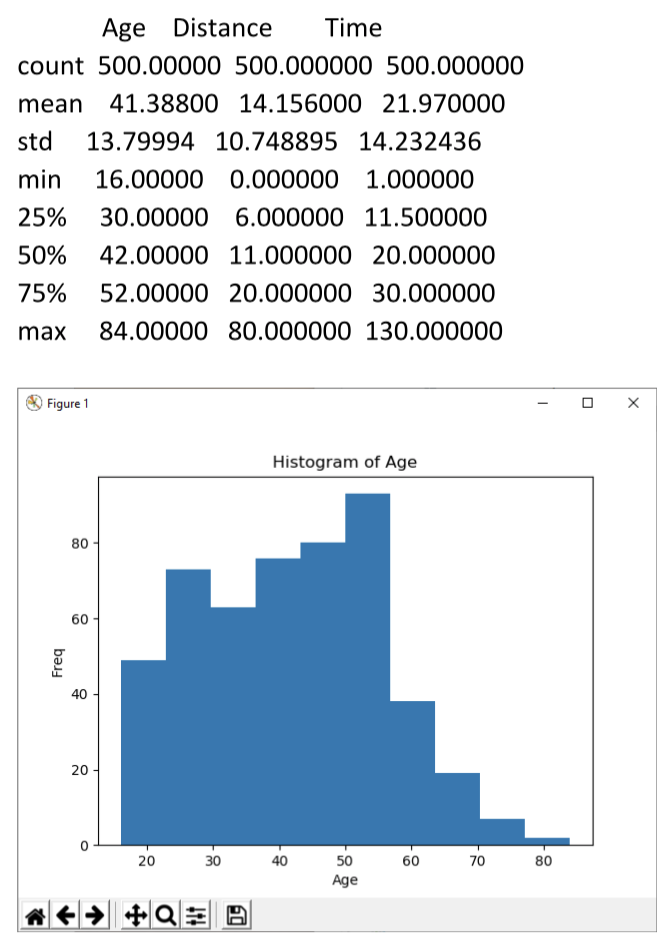

             Age    Distance        Time
count  500.00000  500.000000  500.000000
mean    41.38800   14.156000   21.970000
std     13.79994   10.748895   14.232436
min     16.00000    0.000000    1.000000
25%     30.00000    6.000000   11.500000
50%     42.00000   11.000000   20.000000
75%     52.00000   20.000000   30.000000
max     84.00000   80.000000  130.000000


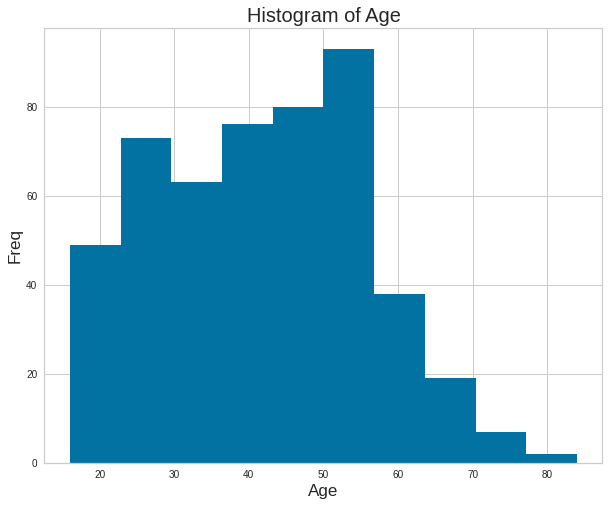

In [ ]:
print(data.describe())
data = pd.read_csv('CommuteStLouis.csv')
plt.hist(data['Age'])
plt.title("Histogram of Age", fontsize=20)
plt.xlabel('Age', fontsize=17)
plt.ylabel('Freq', fontsize=17)
plt.gcf().set_size_inches(10,8)
plt.show()

### 2. For the data CommuteStLouis:

a. Produce a correlation matrix of age, distance and time. Which two numeric variables are most highly correlated? What is the correlation coefficient for the above pair? Hint: If df is your dataframe then you can use print(df.corr()).

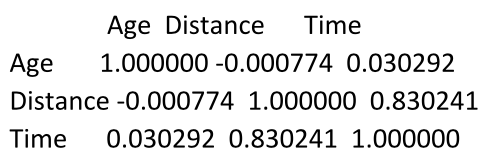

b. Create a scatterplot matrix of the numeric variables in the data. What do the figures in the diagonal going from the top left to the bottom right show? What can you say about the skewness of the various attributes?

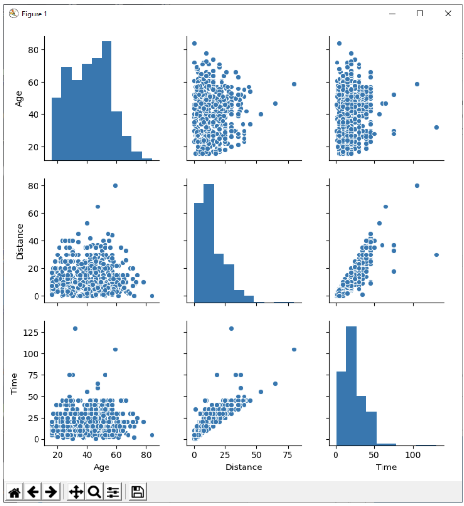

c. Produce a side-by-side boxplot of distance travelled by gender. Do the data in the file indicate that women tend to commute shorter distances?

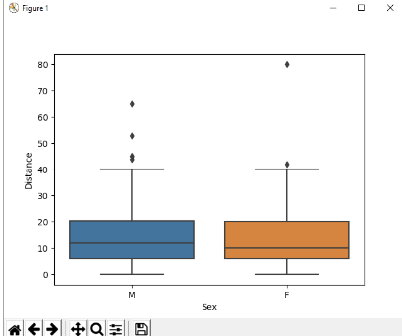

Part a:
               Age  Distance      Time
Age       1.000000 -0.000774  0.030292
Distance -0.000774  1.000000  0.830241
Time      0.030292  0.830241  1.000000

Part b:


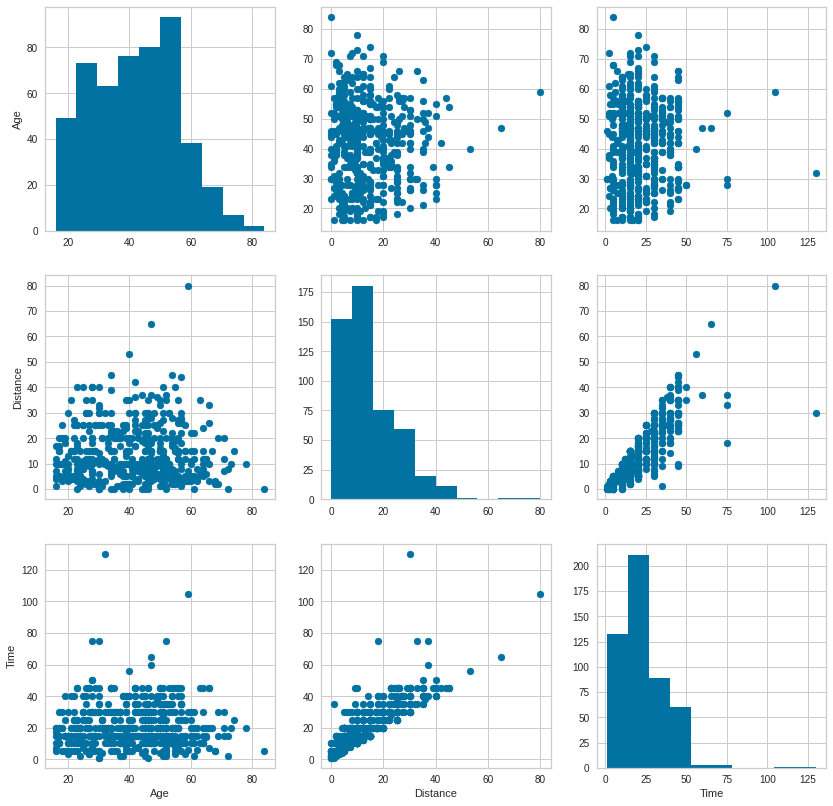


Part C:



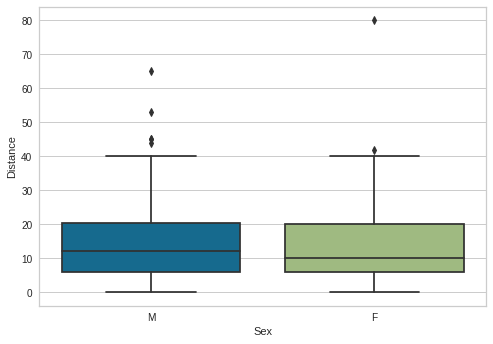

In [ ]:
print('Part a:')
print(data.corr())
# distance and time are most highly correlated

print('\nPart b:')
fig = plt.figure()
plt.gcf().set_size_inches(14,14)

plt.subplot(3,3,1)
plt.hist(data['Age'])
plt.ylabel('Age')

plt.subplot(3,3,2)
plt.scatter(data['Distance'], data['Age'])

plt.subplot(3,3,3)
plt.scatter(data['Time'], data['Age'])

plt.subplot(3,3,4)
plt.scatter(data['Age'], data['Distance'])
plt.ylabel('Distance')

plt.subplot(3,3,5)
plt.hist(data['Distance'])

plt.subplot(3,3,6)
plt.scatter(data['Time'], data['Distance'])

plt.subplot(3,3,7)
plt.scatter(data['Age'], data['Time'])
plt.ylabel('Time')
plt.xlabel('Age')

plt.subplot(3,3,8)
plt.scatter(data['Distance'], data['Time'])
plt.xlabel('Distance')

plt.subplot(3,3,9)
plt.hist(data['Time'])
plt.xlabel('Time')
plt.show()

# The distributions are all skew-right. Time is more tightly bound than the other two distributions.
# Time and distance are highly correlated which logically makes sense because if you are driving somewhere closer,
# it will likely take less time, and thus the distributions are also very similar. Age is not correlated much at all
# with time or distance, and it makes sense that its distribution is clumped around the rough mean age of drivers; it
# also makes sense that it is skew right since there are less very very old people who drive (and none who drive that 
# are under age 16 due to the law)

print('\nPart C:\n')
sb.boxplot(x=data['Sex'], y=data['Distance'])
plt.show()

# No, the data does not suggest that women drive any shorter than men do




### 3. For the pair in Question 2.a plot the scatter plot. Also superimpose a linear regression line on the plot.

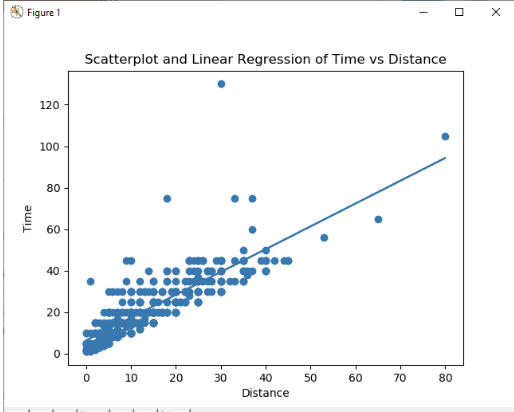

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """


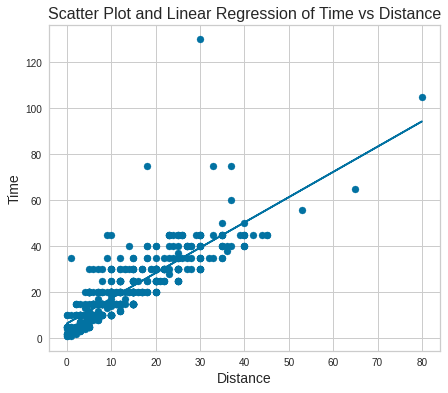

In [ ]:
plt.scatter(data['Distance'], data['Time'])
regression = LinearRegression()
x = data['Distance']
y = data['Time']
X = x[:, np.newaxis]
regression.fit(X, y)
predictions = regression.predict(X)
plt.plot(X, predictions)
plt.gcf().set_size_inches(7,6)
plt.xlabel('Distance', fontsize=14)
plt.ylabel('Time', fontsize=14)
plt.title('Scatter Plot and Linear Regression of Time vs Distance', fontsize=16)
plt.show()


### 4. Show the distribution of residuals of the data from Part 3.

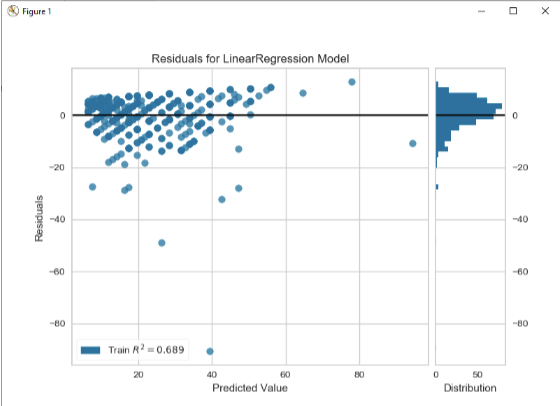

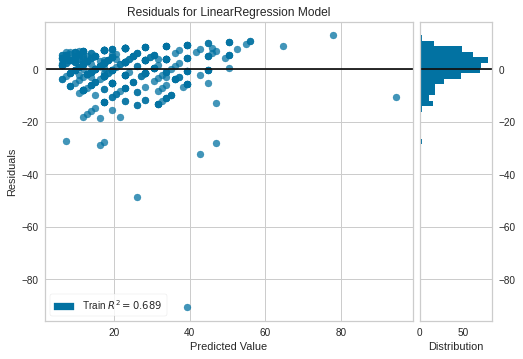

In [ ]:
visualize = ResidualsPlot(regression)
visualize.fit(X, y)
visualize.poof()

# residuals don't follow too much of a pattern, E(epsilon) is near zero and it 
# appears to have a slightly skewed-right distrubtion (not desireable, though 
# close to that of the desired normal distribution)